In [ ]:
!unzip cartoon.zip

In [3]:
# load images from directory

from keras.utils import image_dataset_from_directory

train_data, valid_data = image_dataset_from_directory(
    directory='cartoon', labels='inferred', class_names=('hello_kitty', 'mickey_mouse'),
    subset='both', validation_split=0.3,
    image_size=(224, 224), batch_size=64, seed=1555)

Found 140 files belonging to 2 classes.
Using 98 files for training.
Using 42 files for validation.


In [4]:
# load pre-trained model

from keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# freeze layers of base model

for layer in base_model.layers:
  layer.trainable = False

In [6]:
# customize model by adding output layers

import keras
from keras import layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(['accuracy']))

In [8]:
model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 18s/step - accuracy: 0.4399 - loss: 0.9313 - val_accuracy: 0.8333 - val_loss: 0.3729
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 19s/step - accuracy: 0.9211 - loss: 0.2115 - val_accuracy: 0.7857 - val_loss: 0.3338
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.9075 - loss: 0.1705 - val_accuracy: 0.9762 - val_loss: 0.1093
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 12s/step - accuracy: 1.0000 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 0.0649
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 15s/step - accuracy: 1.0000 - loss: 0.0291 - val_accuracy: 0.9762 - val_loss: 0.0774


In [ ]:
!unzip test.zip

In [10]:
# load sample images to test model output

import numpy as np
from keras.utils import load_img

test_sample = []

for k in range(12):
    img_file = 'test/' + str(k+1) + ".jpg"
    test_img = load_img(img_file, target_size=(224, 224))
    test_sample.append(test_img)

np.array(test_sample).shape

(12, 224, 224, 3)

In [11]:
# run predictions

y = model.predict(np.array(test_sample))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


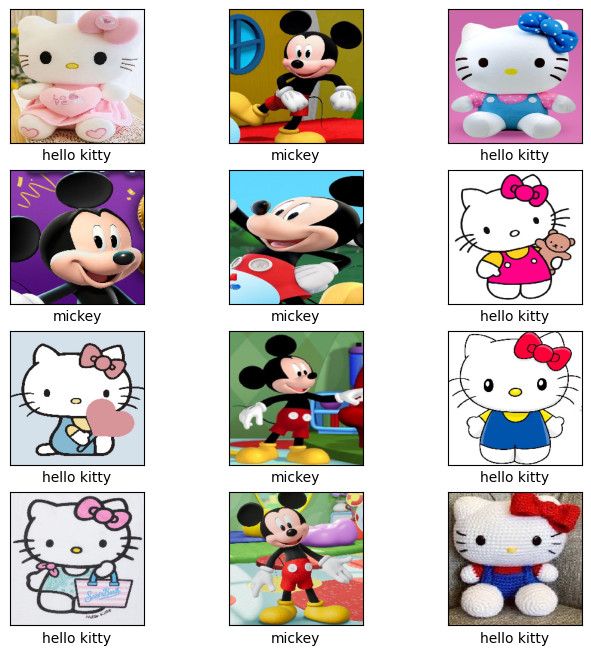

In [12]:
# plot model output predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

class_names = ['hello kitty', 'mickey']

for k in range(12):
  plt.subplot(4, 3, k+1)
  plt.imshow(test_sample[k])

  plt.xlabel(class_names[np.argmax(y[k])])
  plt.xticks([])
  plt.yticks([])